<a href="https://colab.research.google.com/github/fhnribeiro/mpv-puc-analise-dados/blob/main/MVP_Fabio_Ribeiro__4052025000834_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Fábio Henrique Neves Reis Ribeiro

**Matrícula:** 4052025000834

**Dataset:** [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales?select=vgsales.csv)

# Descrição do Problema



O objetivo deste trabalho é tentar encontrar as relações dos jogos mais vendidos e como cada plataforma se comporta, se podemos categorizar os gêneros por mercados, plataformas ou pelo ano de lançamento.

## Hipóteses

1. O sucesso comercial de uma plataforma não depende apenas do número de jogos lançados.
2. O ciclo de vida dos consoles segue um padrão, com picos de produção e vendas nos primeiros anos após o lançamento.
3. O gênero dos jogos influencia significativamente o desempenho de vendas em diferentes regiões.

## Tipo de Problema

Este é um problema de análise exploratória, cujo objetivo é avaliar o comportamento das vendas de jogos, analisando os mercados norte americano, europeu, japonês e o resto do mundo.

Busca-se entender se é possível identificar padrões de venda com base no gênero, console e mercado, a fim de traçar um perfil detalhado do desempenho no setor.

## Seleção de Dados

O dataset *Video Games Sales* é um conjunto de dados baixado do site *vgchartz.com*. Ele é composto apenas por jogos que venderam pelo menos 100 mil cópias.

## Atributos do Dataset

O dataset é composto por 16.598 registros e possui 11 atributos:

- ***Rank*** (Classificação geral no ranking de vendas)
- ***Name*** (Nome do jogo)
- ***Platform*** (Plataforma)
- ***Year*** (Ano de lançamento)
- ***Genre*** (Gênero do jogo)
- ***Publisher*** (Estúdio)
- ***NA_Sales*** (Vendas na América do Norte)
- ***EU_Sales*** (Vendas na Europa)
- ***JP_Sales*** (Vendas no Japão)
- ***Other_Sales*** (Vendas no resto do mundo)
- ***Global_Sales*** (Total de vendas no mundo inteiro)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [36]:
#Url da base de dados
url_dados = ("https://raw.githubusercontent.com/fhnribeiro/mpv-puc-analise-dados/refs/heads/main/data/vgsales.csv")

In [37]:
# guardo o dataset em um dataframe que dei o nome de games_raw
games_raw = pd.read_csv(url_dados)
# Faço uma cópia dos dados originais, para não afetar as tabelas de visualização
# de dados, após o pré processamento
games = games_raw.copy()

Os 10 primeiros registros do dataset

In [38]:
# primeiras 10 linhas
games_raw.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Análise de Dados

Nesta etapa, vamos analisar as dimensões dos dados do dataset e como ele é composto.

## Total e Tipo das Instâncias


In [39]:
#Quantidade de registros no dataset
print(f"Total de instâncias: {len(games_raw)}")
#Análise dos atributos
print("\nTipos de dados por coluna:")
print(games_raw.info())

Total de instâncias: 16598

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Podemos observar que o dataset é composto por 16.598 registros, contendo 11 atributos, descritos acima.

Os atributos Year e Publisher possuem um número diferente de registros. Por isso, farei uma análise individual de cada um.


In [40]:
print('Análise da coluna de ano')
print(games_raw['Year'].describe())
print('')
print('Análise da coluna da publicadora')
print(games_raw['Publisher'].describe())
print('')
ambos_nulos = games_raw[games_raw['Year'].isnull() & games_raw['Publisher'].isnull()]
print("Entradas com 'Year' nulo:", games_raw['Year'].isnull().sum())
print("Entradas com 'Publisher' nulo:", games_raw['Publisher'].isnull().sum())
print("Ambos nulo:", len(ambos_nulos) )

Análise da coluna de ano
count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Análise da coluna da publicadora
count               16540
unique                578
top       Electronic Arts
freq                 1351
Name: Publisher, dtype: object

Entradas com 'Year' nulo: 271
Entradas com 'Publisher' nulo: 58
Ambos nulo: 22


### Limpeza de dados


Com a análise feita acima, podemos perceber que dois campos possuem registros com dados inválidos: o ano e a publicadora. Como não são dados que possam ser tratados utilizando uma média ou algum valor padrão, eles serão apenas ignorados.

In [41]:
# Remove os valores nulos do dataset com os dados que serão utilizados para
# visualização daqui para frente
games = games.dropna()
print(games.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


Com isso, o total de registros ficou em 16.291.

Além dos registros com valor nulo, durante o uso do dataset foi encontrado um registro do console Nintendo DS, que estava com o ano de lançamento muito inferior aos demais, inclusive inferior à data de lançamento do próprio console, por isso resolvi removê-lo.

In [42]:
filtro = ~((games['Year'] < 2000) & (games['Platform'] == 'DS'))
games = games[filtro]

Conversão do ano de float para inteiro, feita a normalização para uma melhor visualização do dado.

In [43]:
games['Year'] = games['Year'].astype(int)

### Análise de Dados

### Análise da produção de jogos e o volume de venda por ano e por console.

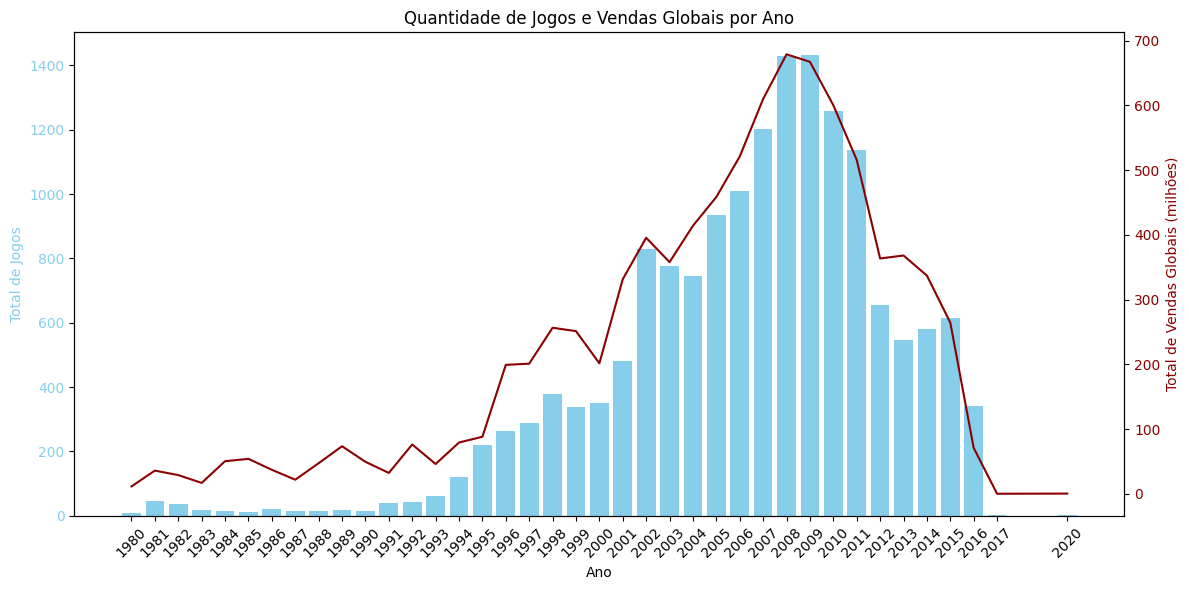

In [44]:
# Agrupa o total de jogos por ano
games_by_year = games.groupby('Year').size()

# Agrupa o total de vendas globais por ano (soma da coluna Global_Sales)
sales_by_year = games.groupby('Year')['Global_Sales'].sum()

# Cria um DataFrame combinando total de jogos e total de vendas, ordenado pela quantidade de jogos
df_grouped = pd.DataFrame({
    'Total_Games': games_by_year,
    'Total_Sales': sales_by_year
}).sort_index(ascending=True)

# Cria o gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(12,6))

# Plota o gráfico de barras para total de jogos
ax1.bar(df_grouped.index, df_grouped['Total_Games'], color='skyblue')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Total de Jogos', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(df_grouped.index)
ax1.set_xticklabels(df_grouped.index, rotation=45)


# Cria o segundo eixo Y e plota a linha de total de vendas
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['Total_Sales'], color='darkred')
ax2.set_ylabel('Total de Vendas Globais (milhões)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

#Informações do gráfico
plt.title('Quantidade de Jogos e Vendas Globais por Ano')
plt.tight_layout()
plt.show()

Com este gráfico, podemos ver que a partir de 1995 há uma forte tendência de crescimento tanto de vendas quanto de número de jogos.

O pico ocorre entre 2007 e 2009, com 1.400 jogos lançados e mais de 650 milhões de unidades vendidas.

Após 2010, há uma queda acentuada nas vendas e na produção de jogos, podendo ser uma limitação do dataset, após a migração para vendas nas próprias lojas das empresas de videogames, que acabam não sendo divulgadas como antes.

É difícil saber o motivo da queda da produção de jogos, mas o aumento do custo de produção e o fato dos jogos serem cada vez maior podem ter influência nesta queda, mas sem os dados no dataset não é possível chegar a esta conclusão

A queda após 2015 é limitação do dataset.

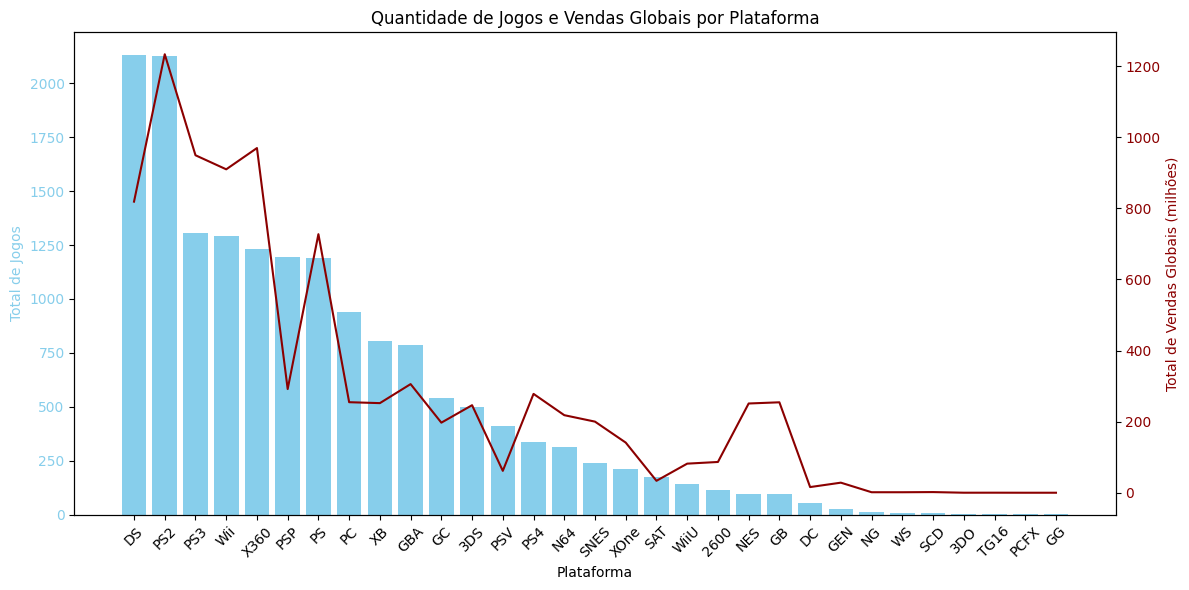

In [45]:
# Agrupa o total de jogos por plataforma
games_by_platform = games.groupby('Platform').size()

# Agrupa o total de vendas globais por plataforma (soma da coluna Global_Sales)
sales_by_platform = games.groupby('Platform')['Global_Sales'].sum()

# Cria um DataFrame combinando total de jogos e total de vendas, ordenado pela quantidade de jogos
df_grouped = pd.DataFrame({
    'Total_Games': games_by_platform,
    'Total_Sales': sales_by_platform
}).sort_values(by='Total_Games', ascending=False)

# Cria o gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(12,6))

# Plota o gráfico de barras para total de jogos
ax1.bar(df_grouped.index, df_grouped['Total_Games'], color='skyblue')
ax1.set_xlabel('Plataforma')
ax1.set_ylabel('Total de Jogos', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticks(df_grouped.index)
ax1.set_xticklabels(df_grouped.index, rotation=45)


# Cria o segundo eixo Y e plota a linha de total de vendas
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['Total_Sales'], color='darkred')
ax2.set_ylabel('Total de Vendas Globais (milhões)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

#Informações do gráfico
plt.title('Quantidade de Jogos e Vendas Globais por Plataforma')
plt.tight_layout()
plt.show()

O gráfico mostra que o PlayStation 2 (PS2) é a plataforma com maior número de vendas globais, apesar de ter menos jogos lançados que o Nintendo DS. Isso indica que o PS2 obteve maior sucesso comercial por título lançado.

Ainda assim, o desempenho do Nintendo DS foi sólid, superou o GameBoy Advanced tanto em volume de vendas quanto em número de títulos, consolidando o domínio da Nintendo no mercado de consoles portáteis.

O Xbox 360 mostra um forte crescimento em comparação ao Xbox original, aproximando-se das vendas do PS3 e indicando uma recuperação significativa da Microsoft frente à Sony.

É importante notar o bom desempenho do Nintendo Wii, que mesmo com menos jogos do que PS2, DS e PS3, atingiu um volume de vendas expressivo.

Por outro lado, o PC apresenta um alto número de lançamentos com vendas globais modestas, mas é a plataforma com maior duração.

### Quantidade de jogos feitas por ano para cada console

Vamos avaliar a vida útil de cada console e quando foi o pico de produção deles.

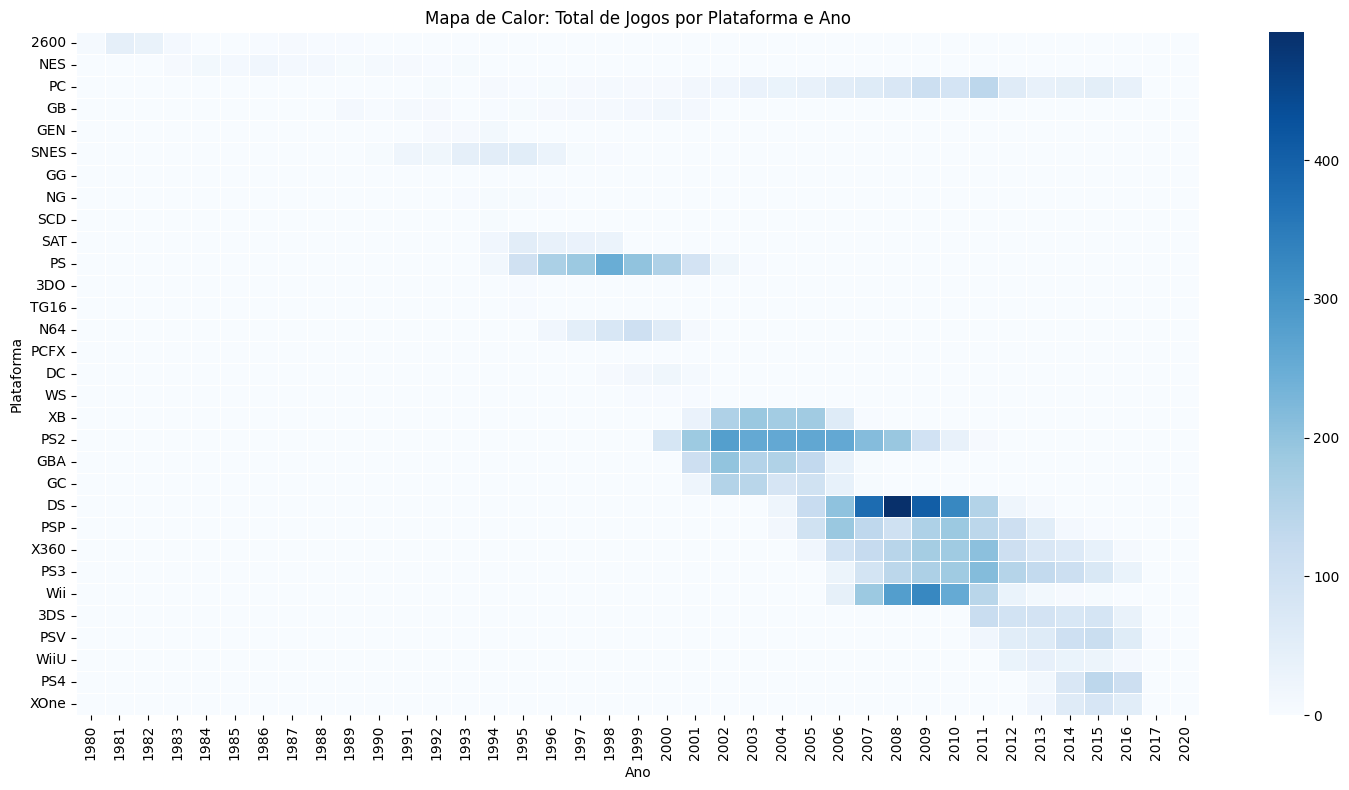

In [46]:
# Agrupa o total de jogos por ano e plataforma
games_grouped = games.groupby(['Year', 'Platform']).size().unstack(fill_value=0).sort_index()

#Obtém o primeiro ano de lançamento para cada plataforma
first_years = games.groupby('Platform')['Year'].min()

#Ordena as plataformas com base no primeiro ano de lançamento
plataform_sorted = first_years.sort_values().index

#Atualizo a lista de jogos conforme a ordem das plataformas
games_grouped = games_grouped[plataform_sorted]

#Plota o heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(games_grouped.T, cmap='Blues', linewidths=0.5)

#Informações do gráfico
plt.title('Mapa de Calor: Total de Jogos por Plataforma e Ano')
plt.xlabel('Ano')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.show()

Com esse mapa de calor, podemos ver como a produção de jogos segue um padrão, onde há um pico de produção entre o 2º e o 4º anos após o lançamento do primeiro jogo, e vai diminuindo logo antes do lançamento do sucessor.

Dá para perceber o sucesso de cada console também, onde o Playstation 1 e 2, e o Nintendo DS e Wii possuem uma produção maior do que os seus concorrentes.

### Os 10 jogos mais vendidos por região

Vamos analisar os jogos mais vendidos em cada região para analisar como se comporta cada mercado

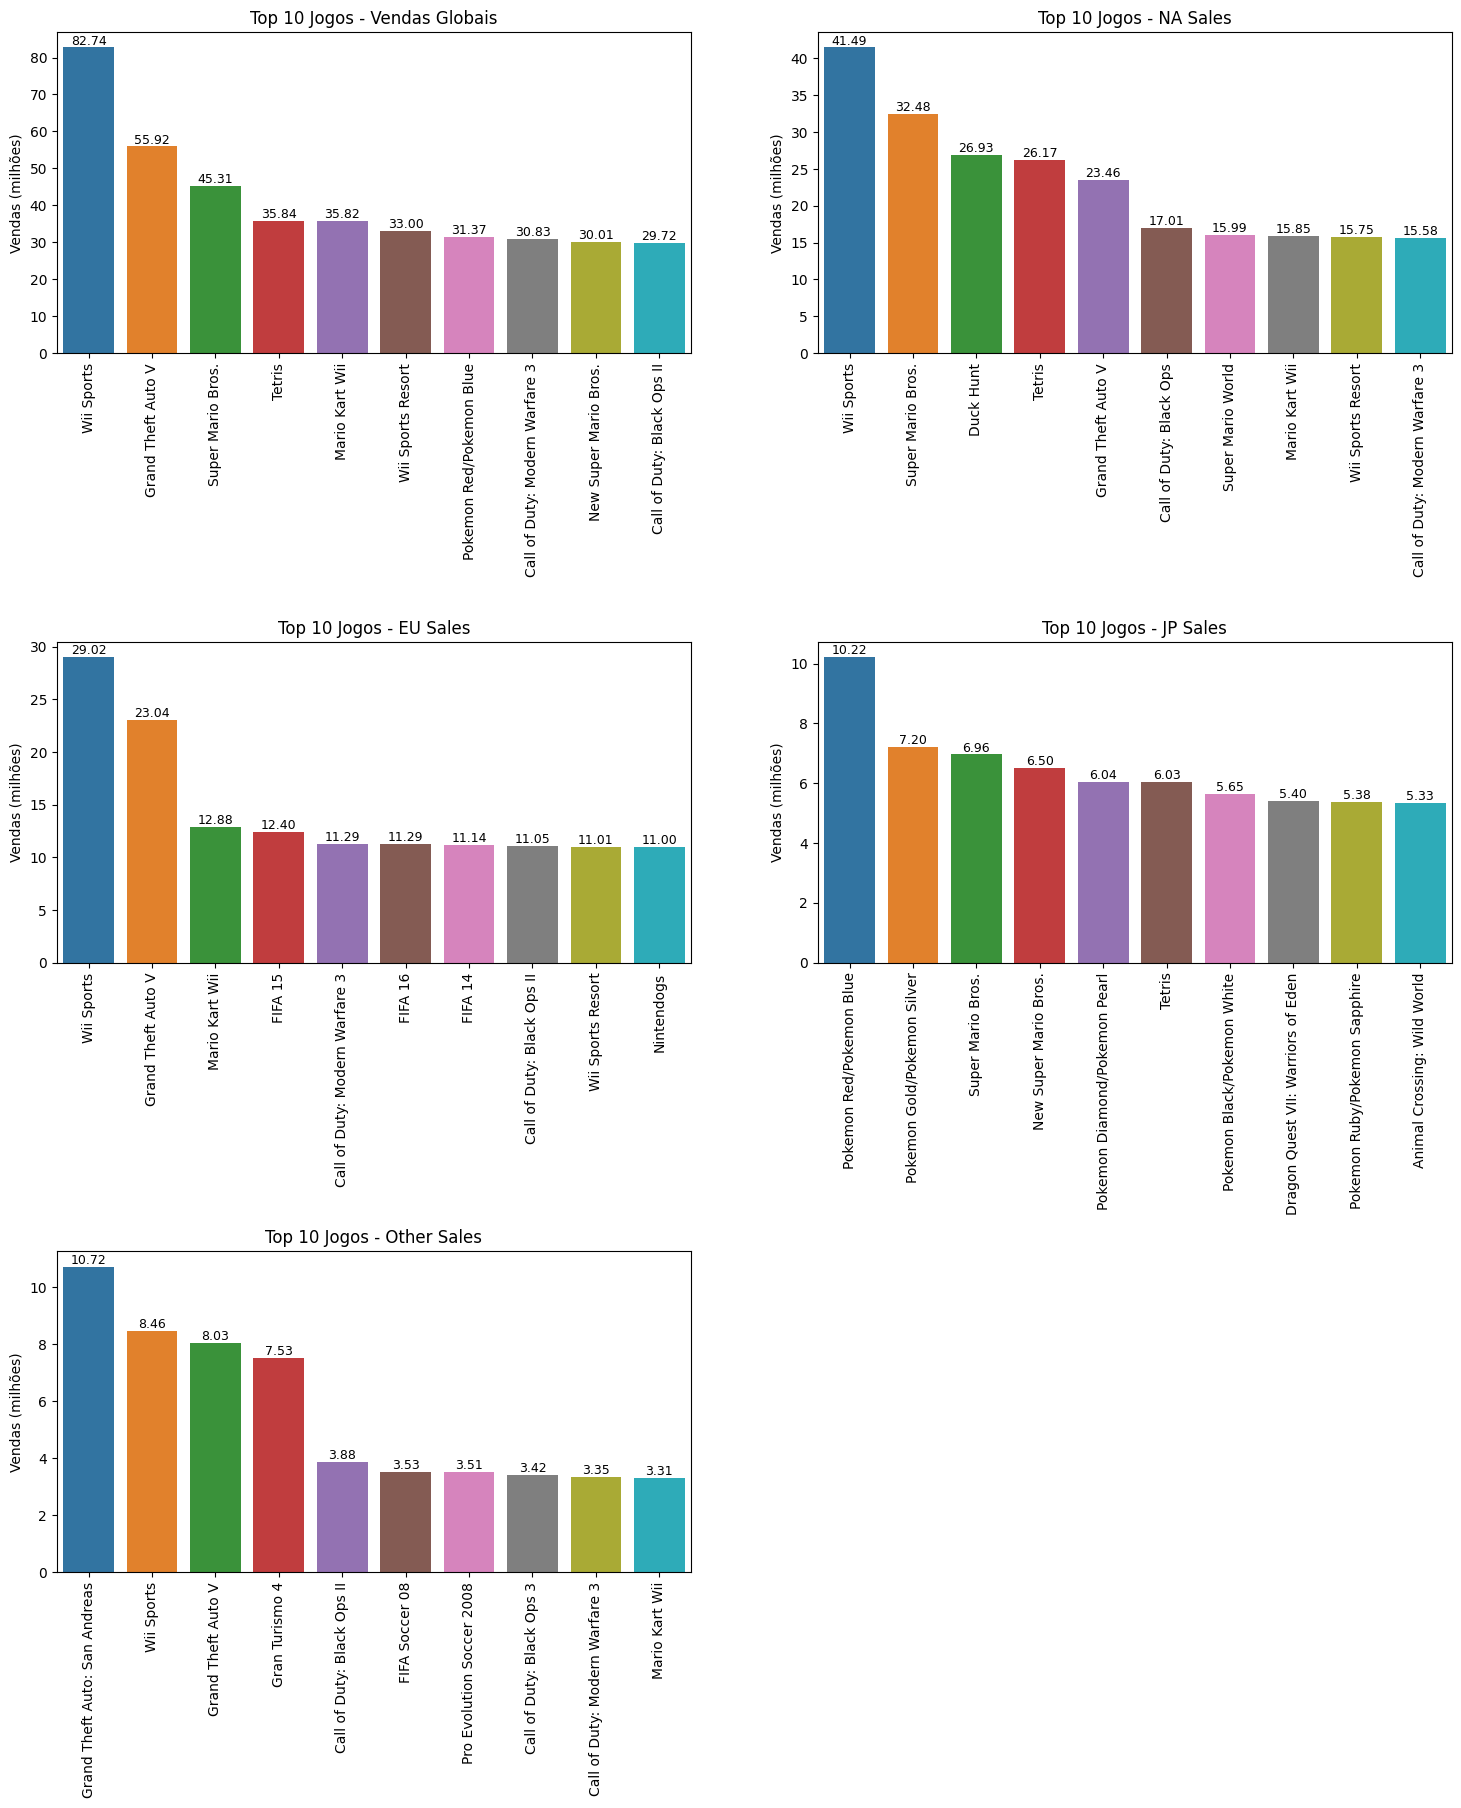

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(18, 20))  # 3 linhas, 2 colunas
plt.subplots_adjust(hspace=0.9)
axes = axes.flatten()  # Transforma a matriz de eixos em lista

# Remove o último eixo excedente (posição 6)
fig.delaxes(axes[-1])  # remove o 6º eixo
axes = axes[:-1]       # mantém apenas os 5 primeiros

#10 jogos mais vendidos global
game_sales_global = games.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)

#10 jogos mais vendidos america do norte
game_sales_na = games.groupby('Name')['NA_Sales'].sum().sort_values(ascending=False).head(10)

#10 jogos mais vendidos europa
game_sales_eu = games.groupby('Name')['EU_Sales'].sum().sort_values(ascending=False).head(10)

#10 jogos mais vendidos japão
game_sales_jp = games.groupby('Name')['JP_Sales'].sum().sort_values(ascending=False).head(10)

#10 jogos mais vendidos japão
game_sales_other = games.groupby('Name')['Other_Sales'].sum().sort_values(ascending=False).head(10)

datasets = [
    (game_sales_global, 'Top 10 Jogos - Vendas Globais'),
    (game_sales_na, 'Top 10 Jogos - NA Sales'),
    (game_sales_eu, 'Top 10 Jogos - EU Sales'),
    (game_sales_jp, 'Top 10 Jogos - JP Sales'),
    (game_sales_other, 'Top 10 Jogos - Other Sales')
]

# Gera os gráficos com rótulo no topo
for i, (data, title) in enumerate(datasets):
    sns.barplot(x=data.index, y=data.values, ax=axes[i], hue=data.index,legend=False)
    axes[i].set_title(title)
    axes[i].set_ylabel('Vendas (milhões)')
    axes[i].set_xlabel('')

    # Rotaciona os rótulos do eixo X
    axes[i].tick_params(axis='x', rotation=90)

    # Adiciona os valores no topo de cada barra
    for bar in axes[i].patches:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

### Analise dos jogos por gênero

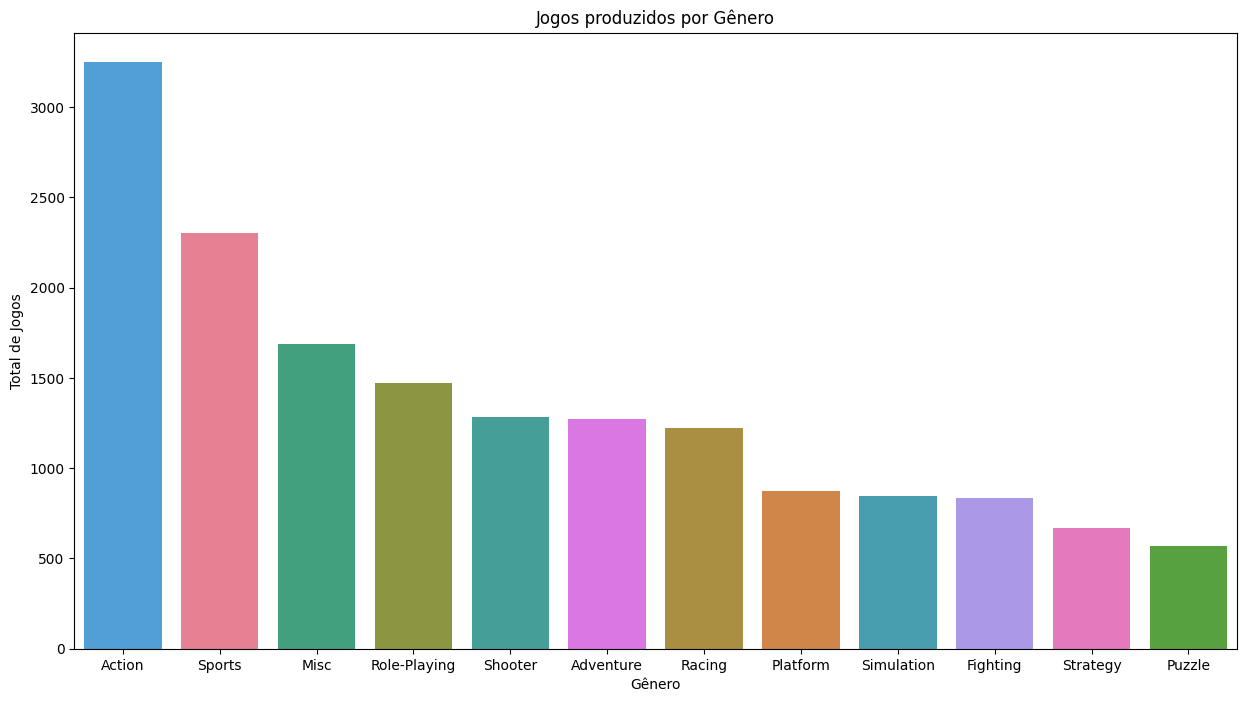

In [48]:
plt.figure(figsize=(15, 8))
sns.countplot(x = 'Genre', data = games, order = games['Genre'].value_counts().index, hue = games['Genre'], legend=False)
plt.xticks(rotation = 0)
plt.title('Jogos produzidos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Total de Jogos')
plt.show()

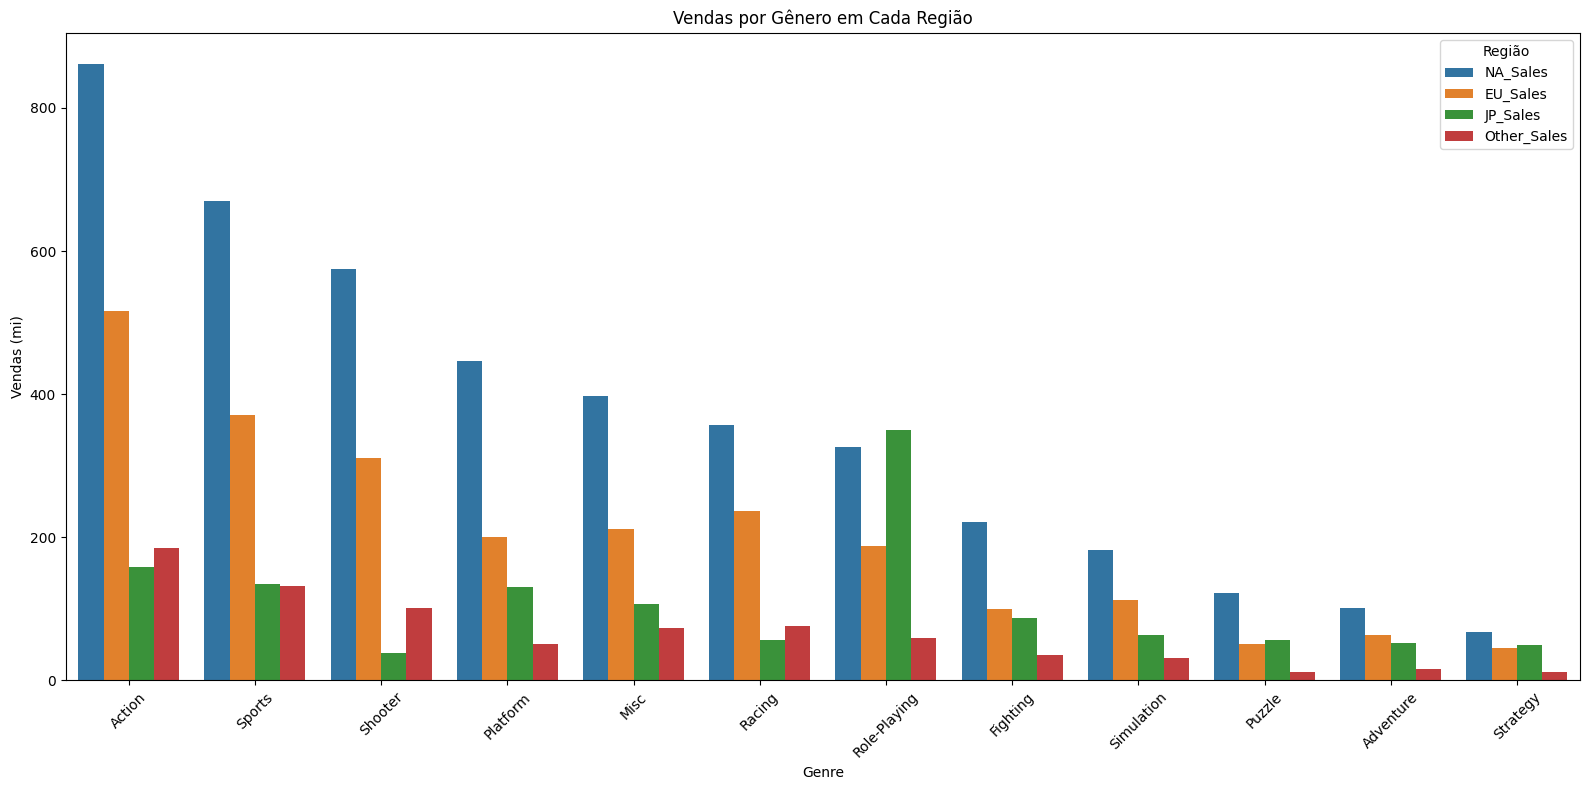

In [49]:
# Supondo que seu DataFrame se chame df
genre_region = games.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values("NA_Sales",ascending=False).reset_index()

genre_region_melted = genre_region.melt(id_vars='Genre', var_name='Região', value_name='Vendas (mi)')

plt.figure(figsize=(16, 8))
sns.barplot(data=genre_region_melted, x='Genre', y='Vendas (mi)', hue='Região')
plt.xticks(rotation=45)
plt.title('Vendas por Gênero em Cada Região')
plt.tight_layout()
plt.show()

Esse gráfico mostra a venda por gênero em cada região. Podemos ver que os gêneros mais vendidos em cada região são:

*  América do Norte: Action, Sports, Shooter, Platform, Racing
*  Europa: Action, Shooter, Sports, Racing
*  Japão: Role-Playing, Platform, Fighting, Puzzle
*  Outras regiões: Seguem NA/EU, com vendas bem mais baixas

Com isso, podemos perceber que a América do Norte e a Europa possuem gostos parecidos, enquanto o Japão prefere jogos com RPG e casuais, possivelmente devido à grande quantidade de consoles portáteis.


#### Analise de vendas por plataforma e gênero

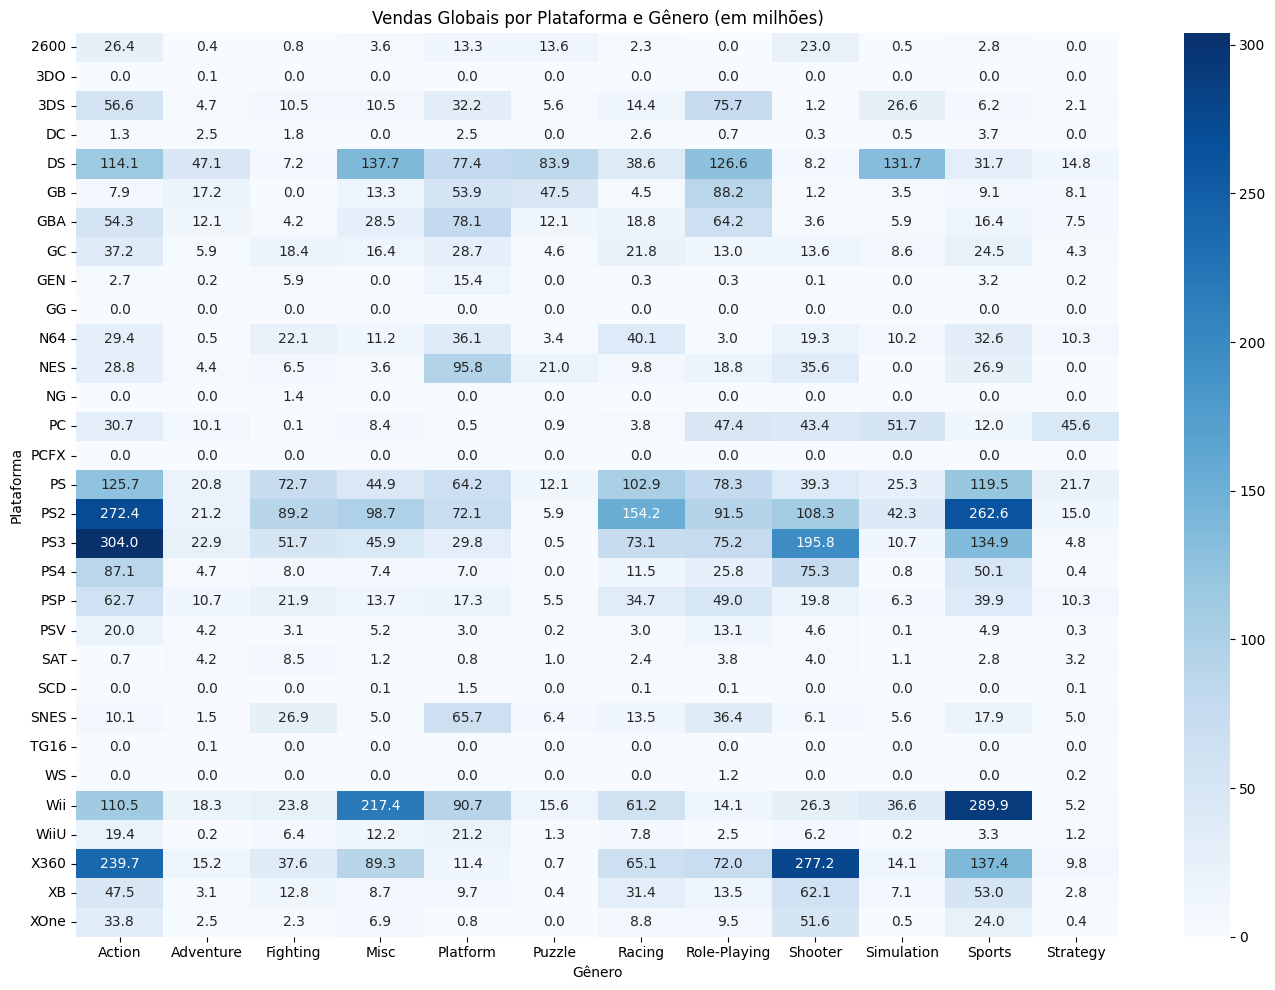

In [50]:
pivot = games.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='Blues')
plt.title('Vendas Globais por Plataforma e Gênero (em milhões)')
plt.xlabel('Gênero')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.show()

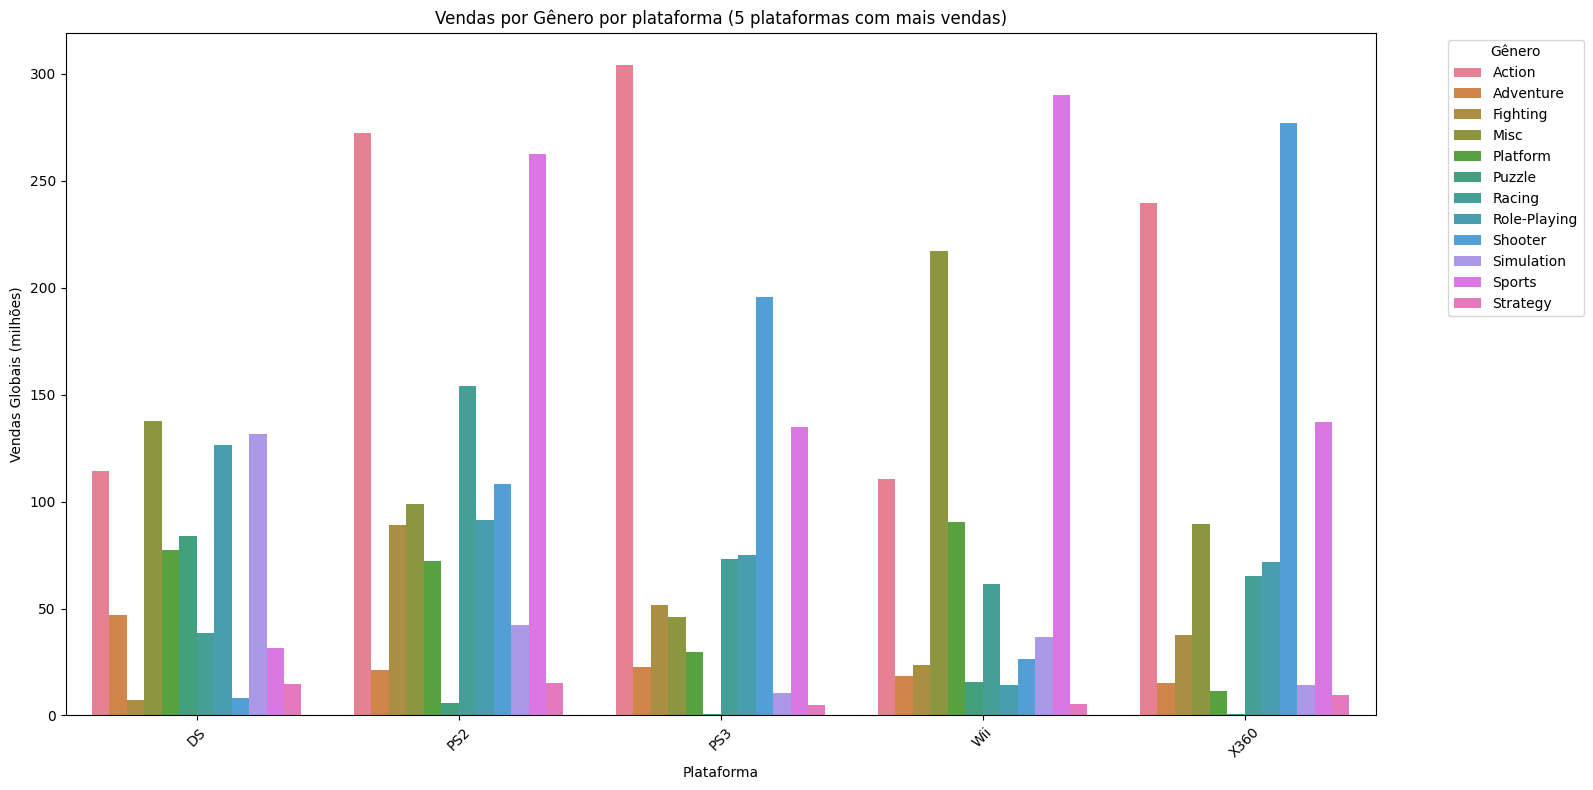

In [51]:
# Agrupamento por Gênero e Plataforma
genre_platform = games.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()


top_platforms = games.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).index
genre_platform = genre_platform[genre_platform['Platform'].isin(top_platforms)]

plt.figure(figsize=(16, 8))
sns.barplot(data=genre_platform, x='Platform', y='Global_Sales', hue='Genre')
plt.title('Vendas por Gênero por plataforma (5 plataformas com mais vendas)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=45)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. PS2 domina em Action e Sports

    Gênero Action ultrapassa 250 milhões de unidades na PS2, seguido de perto por Sports.

    Consolida a PS2 como plataforma dominante em variedade e volume de jogos.

2. Wii lidera em Platform e Sports

    Vendas muito altas em Platform e Sports.


3. Xbox 360 e PS3 têm desempenho equilibrado

    Alto desempenho em Shooter, Action e Sports.

    Xbox 360 tem o maior pico em Shooter.

4. DS tem diversidade e força em Puzzle e Simulation

    Boa distribuição entre gêneros.

    Destaque para Puzzle, Simulation, Platform e Misc

## Estatísticas Descritivas

Vamos analisar as dimensões do dataset e identificar os atributos que o compõem

In [52]:
# estatísticas descritivas básicas do dataset
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000,16290.000000
mean,8289.724923,2006.406875,0.265663,0.147740,0.078837,0.048429,0.540942
std,4792.433562,5.830179,0.822455,0.509317,0.311889,0.190088,1.567387
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8291.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12438.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Aqui podemos ver as médias de vendas, e como o mercado da América do Norte e da europa são fortes, mas o Japão apesar de possuir uma população menor dos que demais possui um mercado expressivo, principalemnte comparado com o resto do mundo.

In [53]:
#Definição das colunas numericas para facilitar
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [54]:
# média dos atributos numéricos do dataset
games.describe().loc['mean']

,mean
Rank,8289.724923
Year,2006.406875
NA_Sales,0.265663
EU_Sales,0.147740
JP_Sales,0.078837
Other_Sales,0.048429
Global_Sales,0.540942


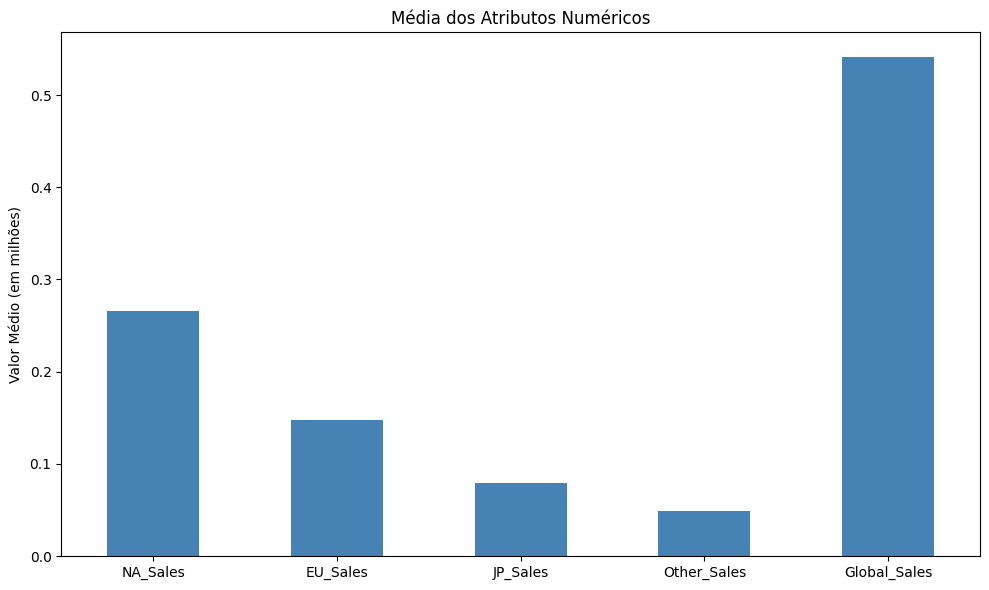

In [55]:
#Removi os campos Rank e Year, pois eles não fazem sentido para um média
mean_values = games[numeric_cols].mean()

# Plot
plt.figure(figsize=(10, 6))
mean_values.plot(kind='bar', figsize=(10,6), color='steelblue')

plt.title('Média dos Atributos Numéricos')
plt.ylabel('Valor Médio (em milhões)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [56]:
# desvio padrão dos atributos numéricos do dataset
games[numeric_cols].describe().loc['std']

,std
NA_Sales,0.822455
EU_Sales,0.509317
JP_Sales,0.311889
Other_Sales,0.190088
Global_Sales,1.567387


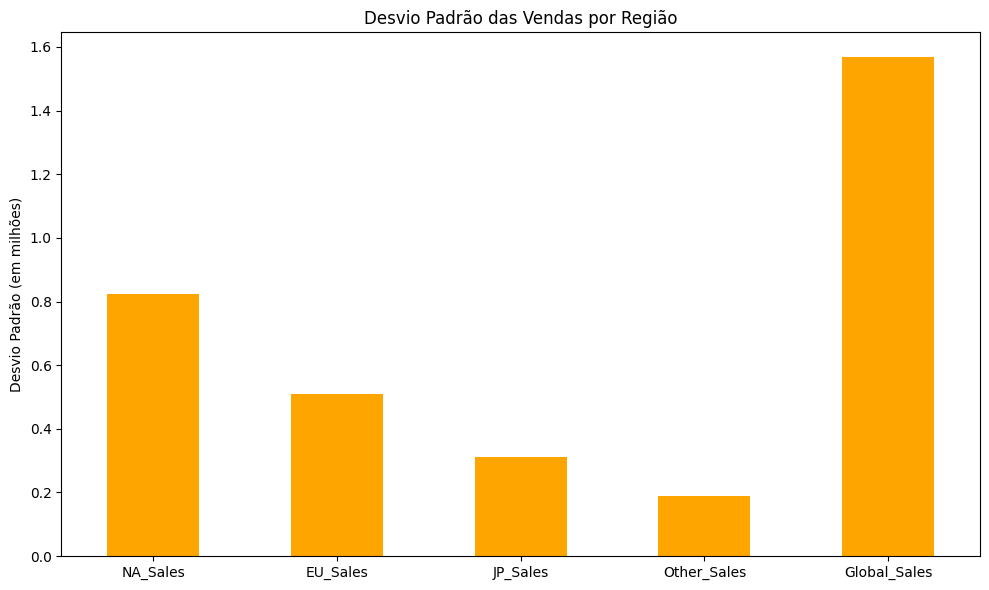

In [57]:
std_series = pd.Series(games[numeric_cols].describe().loc['std'])

# Plota o gráfico
std_series.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Desvio Padrão das Vendas por Região')
plt.ylabel('Desvio Padrão (em milhões)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Histograma

Vamos analisar o total de venda em cada mercado, para uma melhor visualização separei os registros em 2 grupos, o primeiro com jogos que tenham entre 1 e 10 milhões de cópias vendidas e o segundo grupo com os que tem mais de 10 milhães

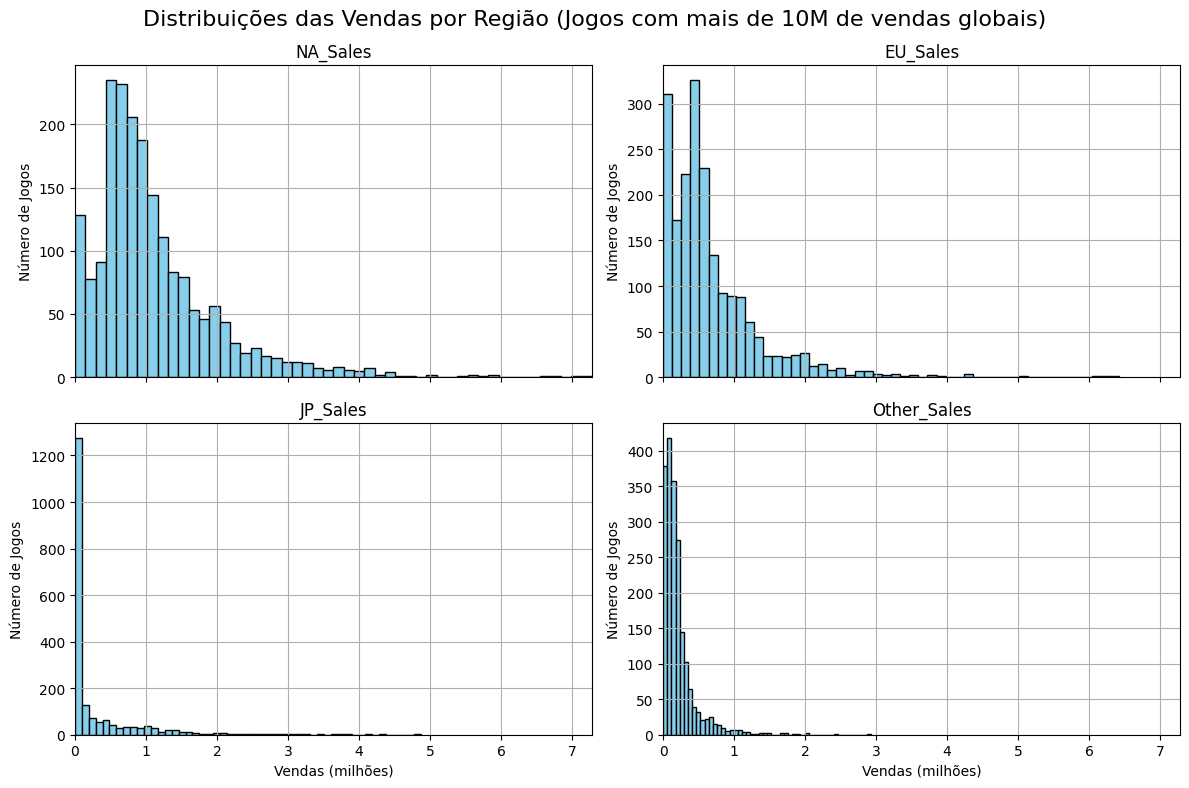

In [58]:
sales_without_gloabl = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
filtered_data = games[(games['Global_Sales'] > 1) & (games['Global_Sales'] <= 10)]
# Define os limites do eixo X (em comum)
x_min = 0
x_max = filtered_data[sales_without_gloabl].max().max()  # maior valor entre as colunas

# Cria os histogramas com eixos X compartilhados
axes = filtered_data[sales_without_gloabl].hist(
    bins=50,
    figsize=(12, 8),
    color='skyblue',
    edgecolor='black',
    sharex=True
)

# Aplica o mesmo limite de eixo X em todos os gráficos
for ax in axes.flatten():
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel('Vendas (milhões)')
    ax.set_ylabel('Número de Jogos')

plt.suptitle('Distribuições das Vendas por Região (Jogos com mais de 10M de vendas globais)', fontsize=16)
plt.tight_layout()
plt.show()

Neste histograma estão sendo exibidos os jogos que possuem entre 1M e 10M de vendas globais.

Podemos que o gráfica bem achatado com a maioria ficando abaixo de 2M

Outra coisa que chama atenção é quantidade de jogos com valor 0 no resto do mundo e principalmente no Japão, o que pode indicar a falta desta informação também

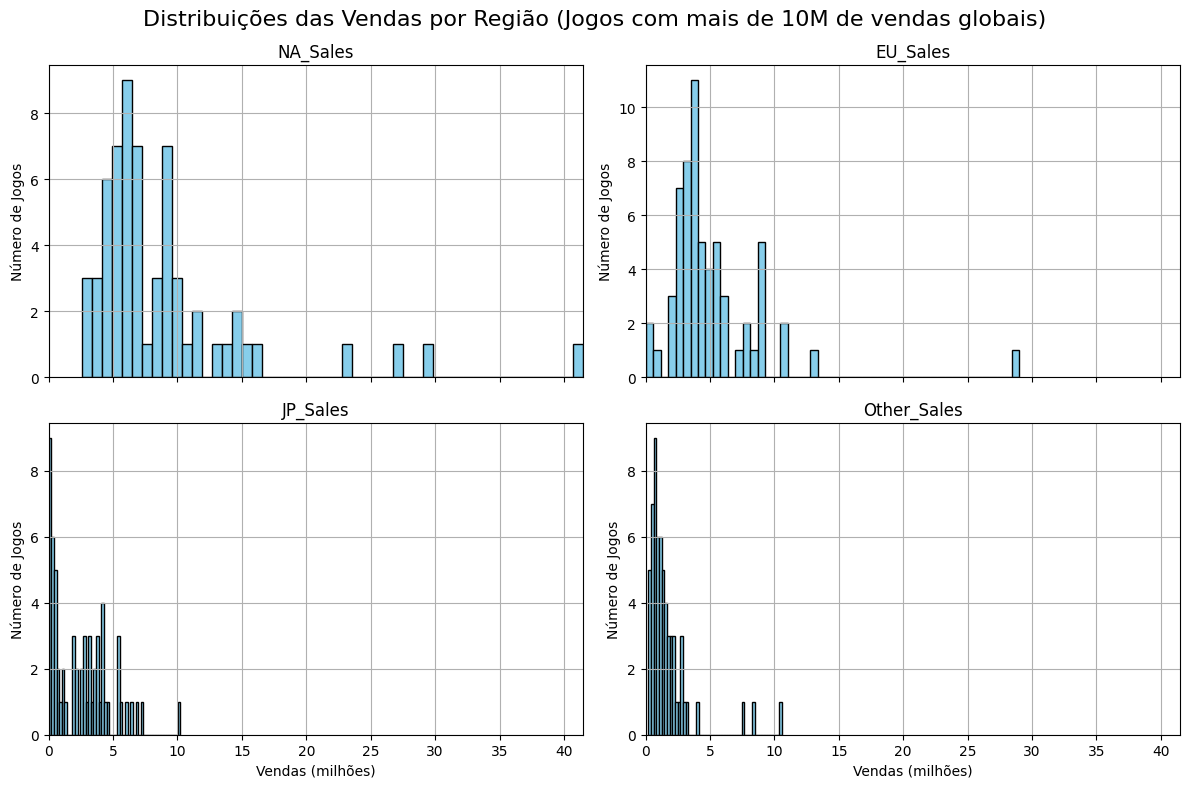

In [59]:
filtered_data = games[games['Global_Sales'] > 10]

# Define os limites do eixo X (em comum)
x_min = 0
x_max = filtered_data[sales_without_gloabl].max().max()  # maior valor entre as colunas

# Cria os histogramas com eixos X compartilhados
axes = filtered_data[sales_without_gloabl].hist(
    bins=50,
    figsize=(12, 8),
    color='skyblue',
    edgecolor='black',
    sharex=True
)

# Aplica o mesmo limite de eixo X em todos os gráficos
for ax in axes.flatten():
    ax.set_xlim(x_min, x_max)
    ax.set_xlabel('Vendas (milhões)')
    ax.set_ylabel('Número de Jogos')

plt.suptitle('Distribuições das Vendas por Região (Jogos com mais de 10M de vendas globais)', fontsize=16)
plt.tight_layout()
plt.show()

Neste histograma, estão sendo exibidos os jogos que possuem mais de 10M de vendas globais.

Podemos ver como o mercado norte-americano tem uma venda maior, com uma distribuição mais ampla, enquanto o japonês e o resto do mundo são mais achatados.

Vale ressaltar a quantidade de jogos no Japão e no resto do mundo que estão com o valor 0.


## Matriz de Correlação

Vamos ver quais as relações entre mercados.

In [60]:
#Array com as colunas de valor númerico, sem considerar o rank e o ano
numeric_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

df_numeric = games[numeric_cols]
# Matriz de correlação
print("\nMatriz de Correlação:")
df_numeric.iloc[:].corr()


Matriz de Correlação:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.768922,0.451282,0.634517,0.941269
EU_Sales,0.768922,1.000000,0.436377,0.726255,0.903263
JP_Sales,0.451282,0.436377,1.000000,0.290557,0.612773
Other_Sales,0.634517,0.726255,0.290557,1.000000,0.747963
Global_Sales,0.941269,0.903263,0.612773,0.747963,1.000000


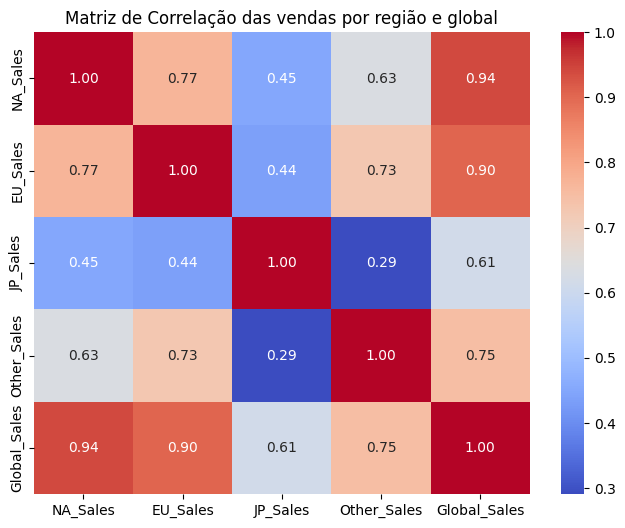

In [61]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df_numeric.iloc[:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das vendas por região e global')
plt.show()

Vendo o mapa de calor, podemos ver que o mercado japonês acaba sendo o mais diferente em relação aos demais, enquanto o norte-americano e o europeu são bem relacionados.

Também podemos perceber a forte relação do mercado norte-americano na venda global.


## Tratamento de Valores Nulos

O dataset possui valores nulos nos atributos Year e Publisher, mas já foram tratados no início do estudo para uma melhor visualização.

In [62]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
games_raw.isnull().sum()

Valores nulos no dataset:


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


Vou criar mais uma instância para poder fazer o pré processamento

In [ ]:
#Cópia dos dados original
games_pre = games_raw.copy()

#Remove os registros nulos
games_pre = games_pre.dropna()

#Converte o ano para inteiro
games_pre['Year'] = games_pre['Year'].astype(int)

Aqui eu poderia colocar o valores nulos do "Publisher" como desconhecido, mas como são poucos casos, preferia apenas removelos também

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [64]:
# Função para remover outliers de 'Year' por 'Platform'
def remove_year_outliers(group):
    q1 = group['Year'].quantile(0.25)
    q3 = group['Year'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return group[(group['Year'] >= lower) & (group['Year'] <= upper)]

# Aplica por grupo
games_pre = games_pre.groupby('Platform', group_keys=False).apply(remove_year_outliers)


/tmp/ipython-input-64-1308075635.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  games_pre = games_pre.groupby('Platform', group_keys=False).apply(remove_year_outliers)


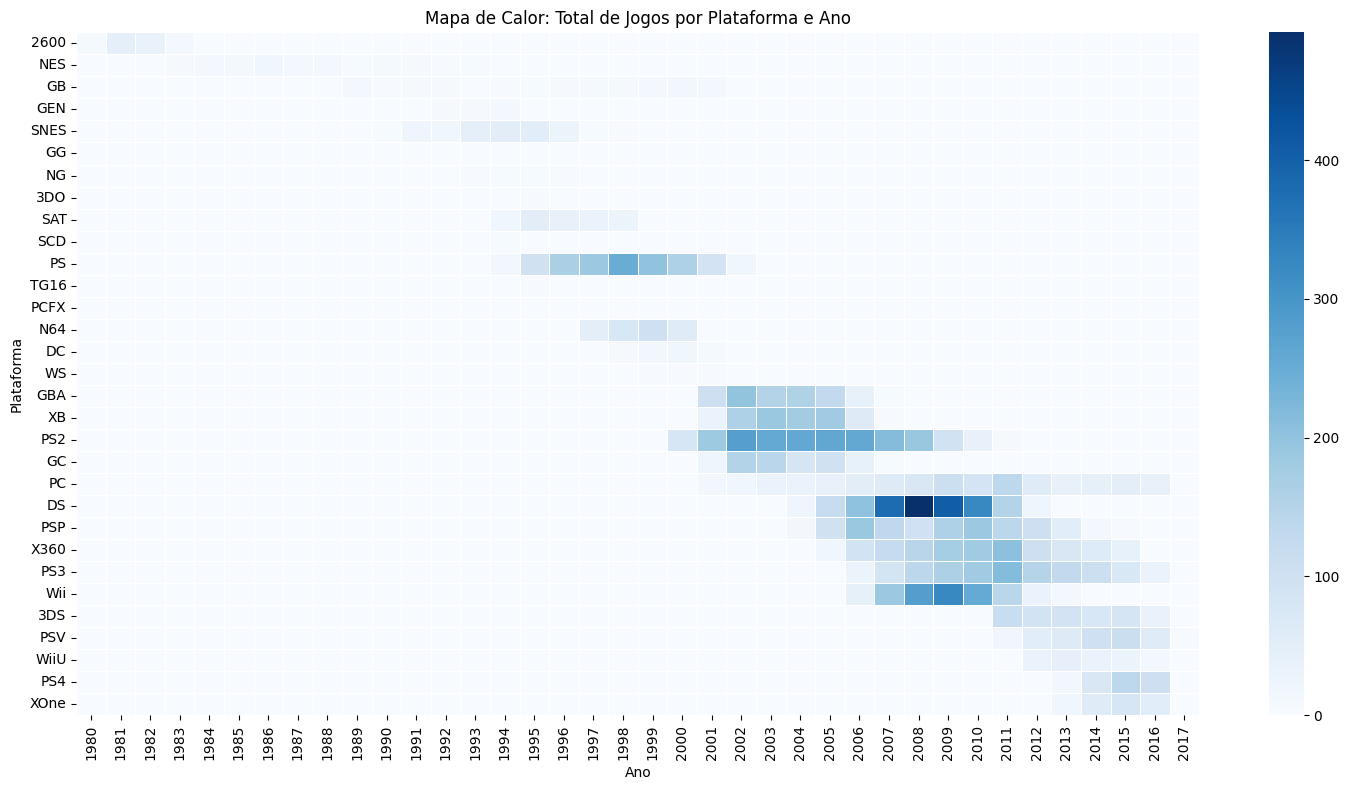

In [65]:
# Agrupa o total de jogos por ano e plataforma
games_grouped = games_pre.groupby(['Year', 'Platform']).size().unstack(fill_value=0).sort_index()

#Obtém o primeiro ano de lançamento para cada plataforma
first_years = games_pre.groupby('Platform')['Year'].min()

#Ordena as plataformas com base no primeiro ano de lançamento
plataform_sorted = first_years.sort_values().index

#Atualizo a lista de jogos conforme a ordem das plataformas
games_grouped = games_grouped[plataform_sorted]

#Plota o heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(games_grouped.T, cmap='Blues', linewidths=0.5)

#Informações do gráfico
plt.title('Mapa de Calor: Total de Jogos por Plataforma e Ano')
plt.xlabel('Ano')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.show()

Aqui podemos ver o mapa de calor sem os outliners, os principais casos foram resolvidos, porém o PC acabou tendo dados indevidamente removidos.

Com essa análise eu preferi remover manualmente apenas o outliner do DS no inicio do projeto.

## Normalização

In [66]:
cols_to_scale = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(games_pre[cols_to_scale])

# Cria DataFrame com os dados escalados
normalized_df = pd.DataFrame(scaled_data, columns=cols_to_scale)

# Exibe os 5 primeiros registros originais
print("Originais:")
print(games_pre[cols_to_scale].head())

# Exibe os 5 primeiros registros normalizados
print("Normalizados:")
print(normalized_df.head())

Originais:
     NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
89       7.28      0.45       0.0         0.08          7.81
239      4.21      0.24       0.0         0.05          4.50
258      4.00      0.26       0.0         0.05          4.31
544      2.56      0.17       0.0         0.03          2.76
734      2.06      0.12       0.0         0.02          2.20
Normalizados:
   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0  0.175464  0.015507       0.0     0.007569      0.094283
1  0.101470  0.008270       0.0     0.004730      0.054273
2  0.096409  0.008959       0.0     0.004730      0.051976
3  0.061702  0.005858       0.0     0.002838      0.033241
4  0.049651  0.004135       0.0     0.001892      0.026472


Nâo achei necessário utilizar os dados normalizados na análise, devido a natureza
dos dados, já estão numa escala boa de visualização e não necessitam de tratamento.

## Padronização



In [67]:
# Seleciona colunas numéricas
cols_to_standardize = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

scaler = StandardScaler()
standardized_data = scaler.fit_transform(games_pre[cols_to_standardize])

# Converte para DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=cols_to_standardize)

# Exibe os 5 primeiros registros originais
print("Originais:")
print(games_pre[cols_to_scale].head())

# Exibe os 5 primeiros registros normalizados
print("Normalizados:")
print(standardized_df.head())

Originais:
     NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
89       7.28      0.45       0.0         0.08          7.81
239      4.21      0.24       0.0         0.05          4.50
258      4.00      0.26       0.0         0.05          4.31
544      2.56      0.17       0.0         0.03          2.76
734      2.06      0.12       0.0         0.02          2.20
Normalizados:
   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0  8.551524  0.595723 -0.253076     0.164616      4.641784
1  4.809806  0.183108 -0.253076     0.007352      2.528881
2  4.553858  0.222405 -0.253076     0.007352      2.407596
3  2.798785  0.045570 -0.253076    -0.097490      1.418170
4  2.189385 -0.052671 -0.253076    -0.149912      1.060700


Da mesma forma da normalização, eu não achei necessário utilizar os dados
padronizados.

# Conclusão

A análise e o pré-processamento do dataset de vendas de jogos demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset, apesar de algumas limitações, permitiu identificar padrões de vendas por região, plataforma e gênero, além de mostrar a evolução do mercado ao longo dos anos.

As principais conclusões foram:

1. O mercado norte-americano e europeu possuem gostos semelhantes, enquanto o Japão apresenta preferências distintas, principalmente por RPGs e jogos casuais.
2. O PlayStation 2 se destaca como a plataforma de maior sucesso em vendas globais por título lançado.
3. A produção de jogos segue um ciclo de vida típico para cada console, com picos nos primeiros anos após o lançamento.
4. O tratamento de valores nulos e a remoção de outliers foram essenciais para garantir a qualidade das análises.

A análise exploratória revelou correlações importantes entre as regiões e a eficácia de visualizações como heatmaps e histogramas para distinguir padrões de vendas.

Hipótese 1

O sucesso comercial de uma plataforma não depende apenas do número de jogos lançados, mas também do desempenho médio de vendas por título.

Verdadeiro, como vimos no gráfico de jogos produzidos x vendas, o DS foi o console com mais jogos produzidos, mas o Playstation 2 acabou sendo o console com maior vendar.

Hipótese 2

O ciclo de vida dos consoles segue um padrão, com picos de produção e vendas nos primeiros anos após o lançamento.

Verdadeiro, como mostrado no mapa de calor e nos gráficos de produção por ano, a maioria dos consoles apresenta um aumento rápido no número de lançamentos e vendas logo após o lançamento, seguido de uma queda antes da chegada do sucessor. Isso indica um ciclo de vida típico para a maioria das plataformas.

Hipótese 3

O gênero dos jogos influencia significativamente o desempenho de vendas em diferentes regiões.

Verdadeiro, conforme evidenciado pelos gráficos de vendas por gênero e região. América do Norte e Europa preferem gêneros como Action, Sports e Shooter, enquanto o Japão se destaca em RPG, Platform e Puzzle. Isso mostra que o perfil de consumo varia bastante entre os mercados, sendo fundamental considerar o gênero ao analisar o desempenho regional de vendas.